# IT Carlow - BSc. 
# License plate recognition
 ##### Data Science and Artificial Intelligence 
 ##### Student Name: Zhe Cui
 ##### Student Number: C00266169
 ##### Lecturer: Greg Doyle




# Introduction
License plate recognition technology refers to the technology that can automatically detect license plates and obtain license plate information. It is a very active research topic in the field of image processing and intelligent transportation system. This technology can be applied in the fields of traffic road dredging, illegal vehicles taking pictures, parking lot charge management and so on, in order to reduce labor costs and improve the efficiency of traffic management.

# System design
The license plate recognition system designed by Zhe Cui is composed of license plate acquisition module, license plate localization module, license plate image preprocessing module, license plate character segmentation module, license plate character recognition module and the recognition output of license plate module.
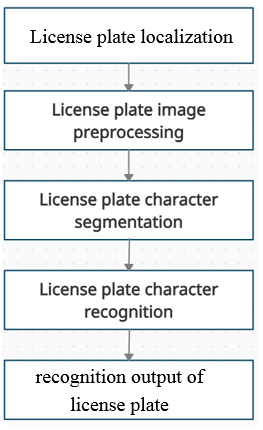

# license plate collection
License plate collection is the first step in automatic identification system. The camera is connected to the computer, and the camera in real-time is transferred to the computer and then processed.

# Data set
### Web Crawling Tools to get data
First of all, using the Scrapy framework of Python language to code the web crawler, because the Scrapy has a good encapsulation of the web crawler technology, which can complete these tedious work faster. Then the web crawler is used to carry out the preliminary crawling of image data on Google images according to the keywords. After manual screening, 500 high-quality license plate pictures were obtained.
### Label data
After data crawling is completed, the images obtained by the crawler should be initially screened, and then label high-quality images by a labeling tool, Labelme.The original image is shown below.


The labeled binarization image is shown below.
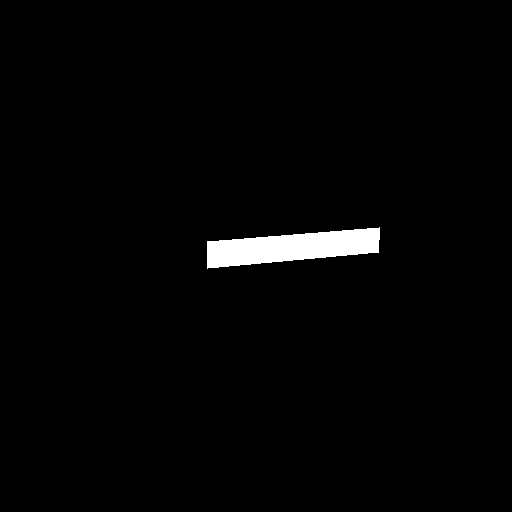
It is necessary to mark each license plate area as accurately as possible when labeling the license plate. As the example of false label of the license plate area shown in below!, the marked area of the license plate, which contains other information is too big, and can cause some interference to the training the model. It is an example of wrong labeling.
As shown example of correct label of the license plate area below, the marked area only contains the license plate, does not contain other interference information. It is a correct sample of license plate annotations.

# core.py
Functions in core.py are used to make some basic transform and operations.
### Gray processing
The input image is a color image, consisting of red, green, and blue, which is called RGB. When R=G=B, the image is gray, and this process from random RGB values to R=G=B is called gray processing, and the grayscale range is 0 to 255. The common processing methods of color image gray processing include the component method, maximum method and weighted average method.
### Binarization
Firstly, setting a threshold, and then transforming the grayscale image which is going to be processed. If the grayscale to be processed has a grayscale value greater than 125, it will become 255, and if it is less than or equal to 125, it will become 0, to achieving binarization. By using graythresh function, the maximum inter-class variance method is used to find the suitable threshold value of the image, and the binarization is completed.
### Image cropping
The image needs to be cropped in order to improve the subsequent accuracy. The  localization of the license plate can be determined through the statistical gray value of the concentrated range. After binarization, the image needs to be inverted to find the black pixels better, and then the number of black dots in the Y direction and X direction is calculated by the projection method. In order to avoid the error caused by the edge, searching from the center position of the license plate to both sides to judge whether the black character is lower than the threshold, if it is lower than the threshold, it is the upper and lower bounds.  In order to avoid the influence of the left border, it is necessary to judge whether the number of black pixels at 1/14 in the x-direction is less than 1. If less than 1, it is judged to be the left border, if not, x=1 is regarded as the left border.
### Straighten the tilted picture
Due to the influence of external factors when photographing the license plate image, such as the angle between the camera and the license plate is not good, the jitter of the vehicle when driving or the license plate is not hung correctly, resulting in the slanting state of the license plate. If using the most basic fixed angle rotation, the tilt angle of normal license plate pictures or oblique pictures may be larger, causing an irreparable impact on subsequent recognition. In this paper, using Radon transform to rotate images. Different images can be calculated to obtain different rotation angles.
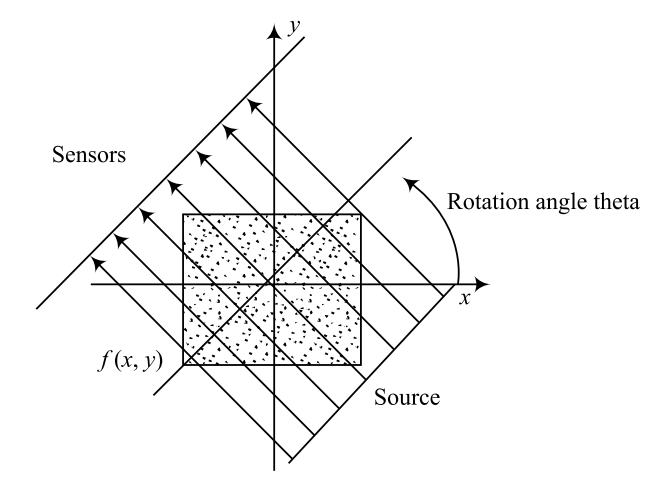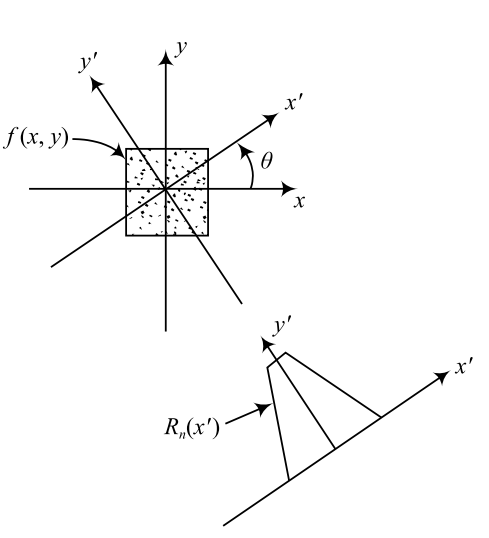
### License plate character segmentation
The methods commonly used for character segmentation include vertical projection, license plate character interval and license plate size detection, license plate character contour detection and so on. The vertical projection method is used in this paper, and the license plate character segmentation process flow is shown as below.
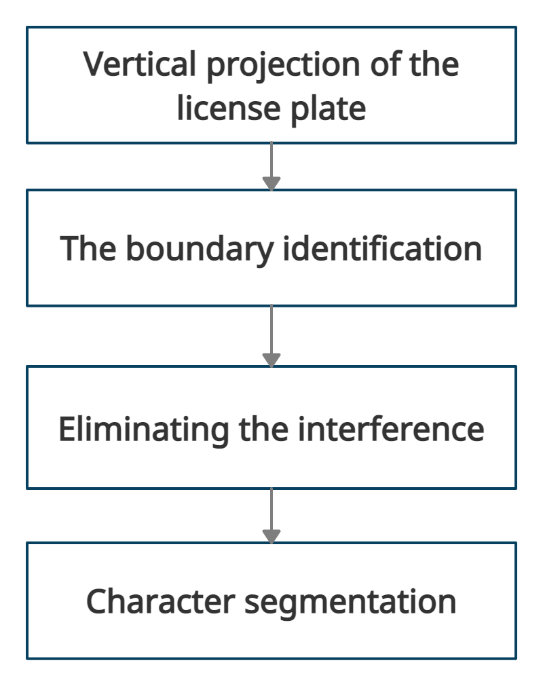
 The figure below shows the vertical projection of a license plate. First, setting a threshold to determine the black and white pixels, and then an array is defined, to count the total number of black pixels in the vertical direction of each column in the image, compare it to the threshold to determine the color of the column.  First, judging whether the first column is black. If it is black and there is no interference, it is the boundary of the first character. According to the composition of characters, in the absence of interference, if the gray value of the region boundary ranges from 255 to 0 and then from 0 to 255, then this region is a character.
Because the above processing may not be perfect, it may leave some interference, one of which is the interference in front of the letter. In order to remove the interference in front of the letter, the following method is used:
(1) Identifying whether the total of black pixels in the black area is less than the threshold value. If it is less than the threshold value, it means that the black area is not the license plate area.
(2) Whether the identified black area is less than half of the width of the next black area. Normally, the identified black area should be greater than the next one or equal to the next one.
If there is interference, the black area is removed through the loop. According to the license plate specification, the segmented characters are classified and recognized subsequently. 
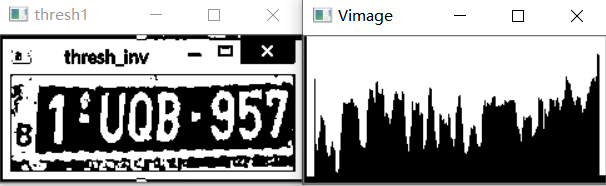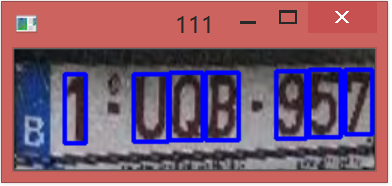
In the experiment, the vertical projection method and Canny operator edge detection method are used for character segmentation, the experimental results show that the vertical projection is not effective, so this report chooses Canny operator character for character segmentation. For the license plate which is located very precisely, there is no interference from other parts when the character segmentation, character splitting results can be good.  But for the license plate which is not located very accurately, the localization results include not only the license plate, but also the other parts of the vehicle.  In the process of vertical projection, other parts will cause interference, and there will be no obvious boundary between multiple characters, then forming a connected domain, leading to unable to cut out the characters.

Vertical projection method determines the horizontal position of characters based on the vertical projection distribution of binary images. The character boundary is considered to be the less white pixel projection (near zero or zero). This puts forward high requirements for the binarization, geometric distortion correction and filtering of license plate image (especially for the integrity, continuity and noise removal after the binarization of license characters). If these aspects are not handled well, the license plate image can not show the projection distribution law required by the method, which makes the judgment decision behind lose the basis. Due to the complexity and diversity of license plate image acquisition environment, it is difficult to meet the requirements of this method in practical application at present, which makes it impossible to determine the horizontal position of characters using this method in many cases. 
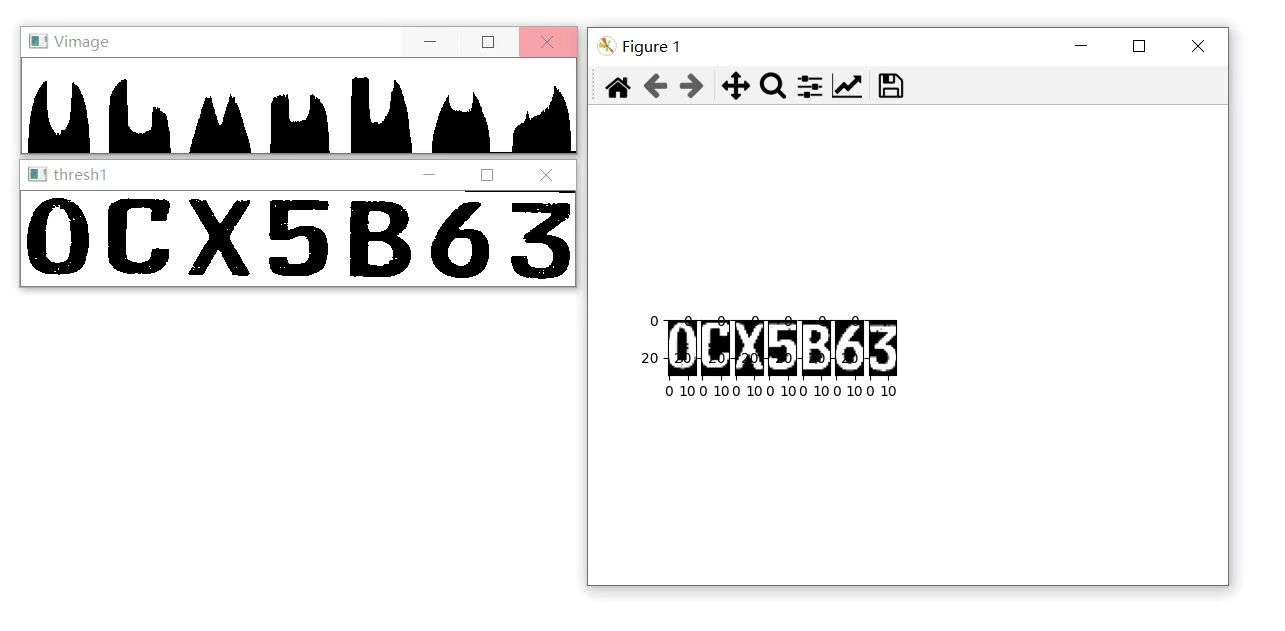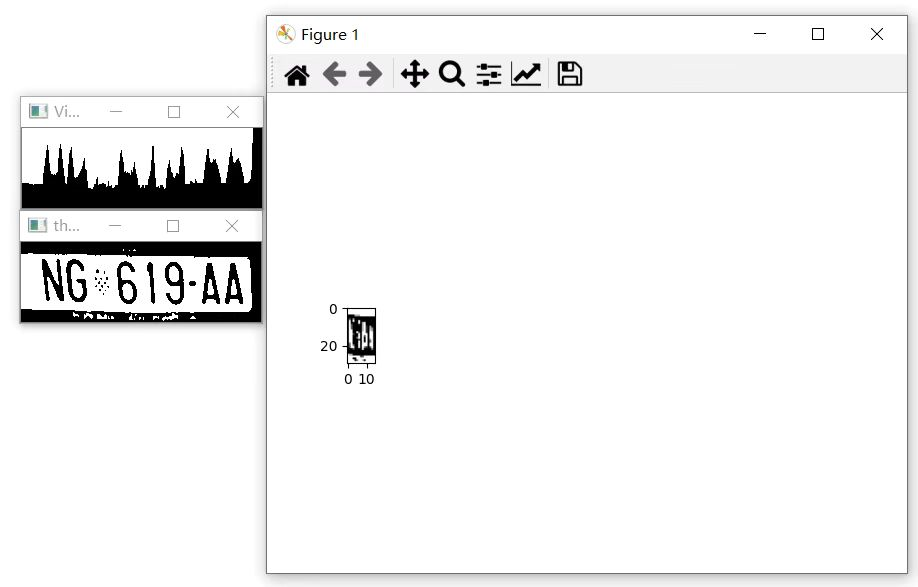
The Canny operator edge detection method follows three criteria for edge detection:
<p>(1) To ensure that the edge is successfully detected, there should be a strong response to the weak edge.
<p>(2) Ensuring good edge positioning.
<p>(3) To ensure that an edge can only be detected once.
<p>The Canny edge detection algorithm can be broken down into 4 steps: 
<p>(1) Two-dimensional Gaussian filter template is convolved with gray image to reduce the impact of noise.
<p>(2) Using derivative operator (such as Prewitt operator and Sobel operator) to find derivative G_x and G_y of image gray along two directions, and find the magnitude and direction of the gradient.
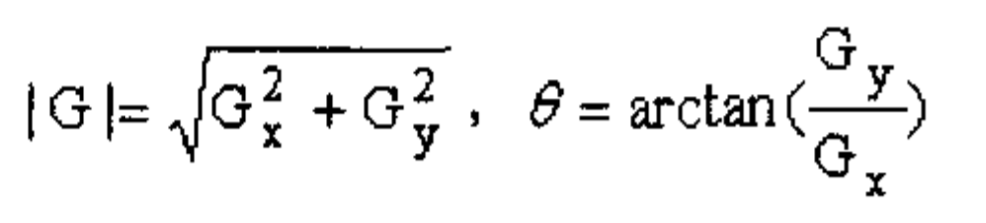
(3) Non-maximum suppression
Traversing the image, if the gray value of a pixel is not the largest compared with the gray value of the two pixels before and after it in the gradient direction, the pixel value is set to 0, which means it is not the edge.
<p>(4) Calculating two thresholds using image cumulative histogram.
A pixel whose gray value is greater than the high threshold is an edge, a pixel whose gray value is less than the low threshold is not an edge, a pixel between two thresholds is an edge if its adjacent pixel has a gray value greater than the high threshold, otherwise, it is not the edge.

The result of edge extraction by Canny operator method is shown as below. For the edge extraction of license plate image,  the Canny operator method can be used to better extract the continuous character contour edge, and at the same time has a good noise suppression. What’s more, the Canny operator method automatically selects corresponding thresholds according to the cumulative histogram of specific gray images, and can generally obtain stable edge extraction results for license plate images in different scenes.
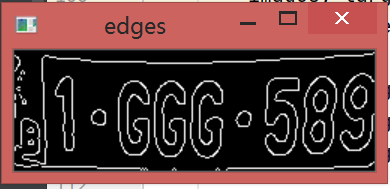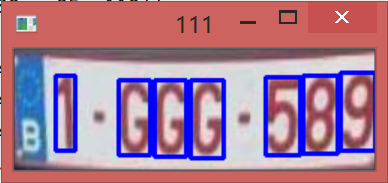


In [ ]:
###core.py

In [ ]:
import cv2
from skimage.feature import hog
import numpy as np
import joblib

def erode_demo(image):  #erode
    ret,binary = cv2.threshold(image,40,255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
    dst = cv2.erode(binary,kernel)
    return dst


def dilate_demo(image):  #dilate
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
    dst = cv2.dilate(image,kernel)
    return dst
def locate_and_correct(img_src, img_mask):
    locate_postion = (0,0)
    img_mask = cv2.cvtColor(img_mask, cv2.COLOR_BGR2GRAY)
    ret, img_mask = cv2.threshold(img_mask,100,255,cv2.THRESH_BINARY)
    # cv2.imshow('thre',img_mask[:, :, 0])
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    contours, hierarchy = cv2.findContours(img_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not len(contours):

        return [], []
    else:
        Lic_img = []
        img_src_copy = img_src.copy()
        for ii, cont in enumerate(contours):
            x, y, w, h = cv2.boundingRect(cont)
            img_cut_mask = img_mask[y:y + h, x:x + w]

            if np.mean(img_cut_mask) >= 50 and w> 20 and h > 10:
                rect = cv2.minAreaRect(cont)
                box = cv2.boxPoints(rect).astype(np.int32)

                cont = cont.reshape(-1, 2).tolist()
                box = sorted(box, key=lambda xy: xy[0])
                box_left, box_right = box[:2], box[2:]
                box_left = sorted(box_left, key=lambda x: x[1])
                box_right = sorted(box_right, key=lambda x: x[1])
                box = np.array(box_left + box_right)

                x0, y0 = box[0][0], box[0][1]
                x1, y1 = box[1][0], box[1][1]
                x2, y2 = box[2][0], box[2][1]
                x3, y3 = box[3][0], box[3][1]

                def point_to_line_distance(X, Y):
                    if x2 - x0:
                        k_up = (y2 - y0) / (x2 - x0)
                        d_up = abs(k_up * X - Y + y2 - k_up * x2) / (k_up ** 2 + 1) ** 0.5
                    else:
                        d_up = abs(X - x2)
                    if x1 - x3:
                        k_down = (y1 - y3) / (x1 - x3)
                        d_down = abs(k_down * X - Y + y1 - k_down * x1) / (k_down ** 2 + 1) ** 0.5
                    else:
                        d_down = abs(X - x1)
                    return d_up, d_down

                d0, d1, d2, d3 = np.inf, np.inf, np.inf, np.inf
                l0, l1, l2, l3 = (x0, y0), (x1, y1), (x2, y2), (x3, y3)
                for each in cont:
                    x, y = each[0], each[1]
                    dis0 = (x - x0) ** 2 + (y - y0) ** 2
                    dis1 = (x - x1) ** 2 + (y - y1) ** 2
                    dis2 = (x - x2) ** 2 + (y - y2) ** 2
                    dis3 = (x - x3) ** 2 + (y - y3) ** 2
                    d_up, d_down = point_to_line_distance(x, y)
                    weight = 0.975
                    if weight * d_up + (1 - weight) * dis0 < d0:
                        d0 = weight * d_up + (1 - weight) * dis0
                        l0 = (x, y)
                    if weight * d_down + (1 - weight) * dis1 < d1:
                        d1 = weight * d_down + (1 - weight) * dis1
                        l1 = (x, y)
                    if weight * d_up + (1 - weight) * dis2 < d2:
                        d2 = weight * d_up + (1 - weight) * dis2
                        l2 = (x, y)
                    if weight * d_down + (1 - weight) * dis3 < d3:
                        d3 = weight * d_down + (1 - weight) * dis3
                        l3 = (x, y)

                locate_postion = l0
                p0 = np.float32([l0, l1, l2, l3])
                p1 = np.float32([(0, 0), (0, 80), (240, 0), (240, 80)])
                transform_mat = cv2.getPerspectiveTransform(p0, p1)
                lic = cv2.warpPerspective(img_src, transform_mat, (240, 80))
                Lic_img.append(lic)
                cv2.drawContours(img_src_copy, [np.array([l0, l1, l3, l2])], -1, (0, 255, 0), 2)  # Drawing the profile of the located license plate on img_src_copy，(0, 255, 0)means that the line drawn is green.
                # cv2.imshow('1111111')
                # cv2.waitKey(0)

    return img_src_copy, Lic_img, locate_postion

def compute(img, min_percentile, max_percentile):
    """The quantile were calculated to remove the anomalies at both ends of the histogram in figure"""
    max_percentile_pixel = np.percentile(img, max_percentile)
    min_percentile_pixel = np.percentile(img, min_percentile)

    return max_percentile_pixel, min_percentile_pixel

def aug(src):
    """Image brightness enhancement"""
    if get_lightness(src) > 100:
        print("The image is bright enough, do not enhance the brightness")
        return src
    # The quantile is calculated first and a few outliers are removed from the pixel value, the quantile can be configured by yourself.
    # For example, the red color of the histogram in 1 has values from 0 to 255, but the actual pixel values are mainly between 0 and 20.

    else:
        max_percentile_pixel, min_percentile_pixel = compute(src, 1, 99)

        # Let's get rid of the values that are outside the range of quantile values
        src[src >= max_percentile_pixel] = max_percentile_pixel
        src[src <= min_percentile_pixel] = min_percentile_pixel

        # Extend the quantile values from 0 to 255. 255*0.1 and 255*0.9 are used because overflow of pixel values is possible, so it is best don't set it from 0 to 255.
        out = np.zeros(src.shape, src.dtype)
        cv2.normalize(src, out, 255 * 0.1, 255 * 0.9, cv2.NORM_MINMAX)

        return out


def get_lightness(src):
    # Calculate the brightness
    hsv_image = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
    lightness = hsv_image[:, :, 2].mean()

    return lightness


# img = cv2.imread(r"./11.jpg")
# img = aug(img)
# cv2.imwrite('out.png', img)


def getVProjection(image):
    # Converts the Image image to a black and white binary image.
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    cv2.imshow('thresh1', thresh1)
    print(thresh1.shape)
    (h, w) = thresh1.shape  # Return the height and width
    a = [0 for z in range(0, w)]  # a = [0,0,0,...,0,0]Initializes an array of length w to count the number of black dots in each column.

    # Record the crest of each column
    for j in range(0, w):  # Traverse a column
        for i in range(0, h):  # Traverse a line
            if thresh1[i, j] == 0:  # If this point is black
                a[j] += 1  # The counter for this column is incremented by one
                thresh1[i, j] = 255  # Turn it white when the recording is done.

    for j in range(0, w):  # Traverse every line
        for i in range((h - a[j]), h):  # Start at the top point where the column should be blackened to the bottom
            thresh1[i, j] = 0  # blackening

    cv2.imshow('Vimage', thresh1)
    cv2.waitKey(0)
    # cv2.destroyAllWindows()


def test_num(image):
    results = []
    image = image[:,25:,:]
    img_ = image.copy()
    clf = joblib.load('./model/' + 'model')
    gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
    thresh_inv = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 39, 1)
    cv2.imshow('thresh_inv', thresh_inv)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    edges = auto_canny(thresh_inv)
    # cv2.imshow('edges', edges)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    ctrs, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    img_area = image.shape[0] * image.shape[1]
    for i, ctr in enumerate(sorted_ctrs):
        x, y, w, h = cv2.boundingRect(ctr)
        roi_area = w * h
        roi_ratio = roi_area / img_area
        if ((roi_ratio >= 0.019) and (roi_ratio < 0.10)):
            if ((h > 1.8 * w) and (10 * w >= h)):
                cv2.rectangle(img_, (x, y), (x + w, y + h), (255, 0, 0), 2)
                # print(fd_list)
                # cv2.imwrite(i+'.jpg',img)
                img_crop = cv2.resize(img_[y:y + h, x:x + w], (75, 100))
                img_crop = np.asarray(img_crop)
                gray = img_crop / 255.0
                fd = hog(gray, orientations=12, block_norm='L1', pixels_per_cell=[8, 8], cells_per_block=[8, 8], visualize=False,
                         transform_sqrt=False)
                data_test_feat = fd.reshape((1, -1)).astype(np.float64)
                result = clf.predict(data_test_feat)
                cv2.imshow('111', img_)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
                results.append(result[0])
    return results



def auto_canny(image, sigma=0.98):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, 50, 150)

    # return the edged image
    return edged
# img1 = cv2.imread('11111111.jpg')
# img1 = test_num(img1)


# Unet.py builds a Unet model.
License plate location is the key of license plate recognition, once the wrong location, the system will not be able to process and recognize the image. This paper adopts U-net network to locate the license plate. U-net is a convolutional neural network, which was originally invented and first used for biomedical image segmentation. The network is based on the fully convolutional network and its architecture was modified and extended to work with fewer training images and to yield more precise segmentation.  
As shown below, the encoder network can be called as a contraction path and the decoder network can be called as an expansion path. The difference between the contraction and the expansion layers is that the pooling operations in the contraction network are replaced by upsampling operation in the expansion network. Also, the expansion network has more filters which results in high-resolution layers.
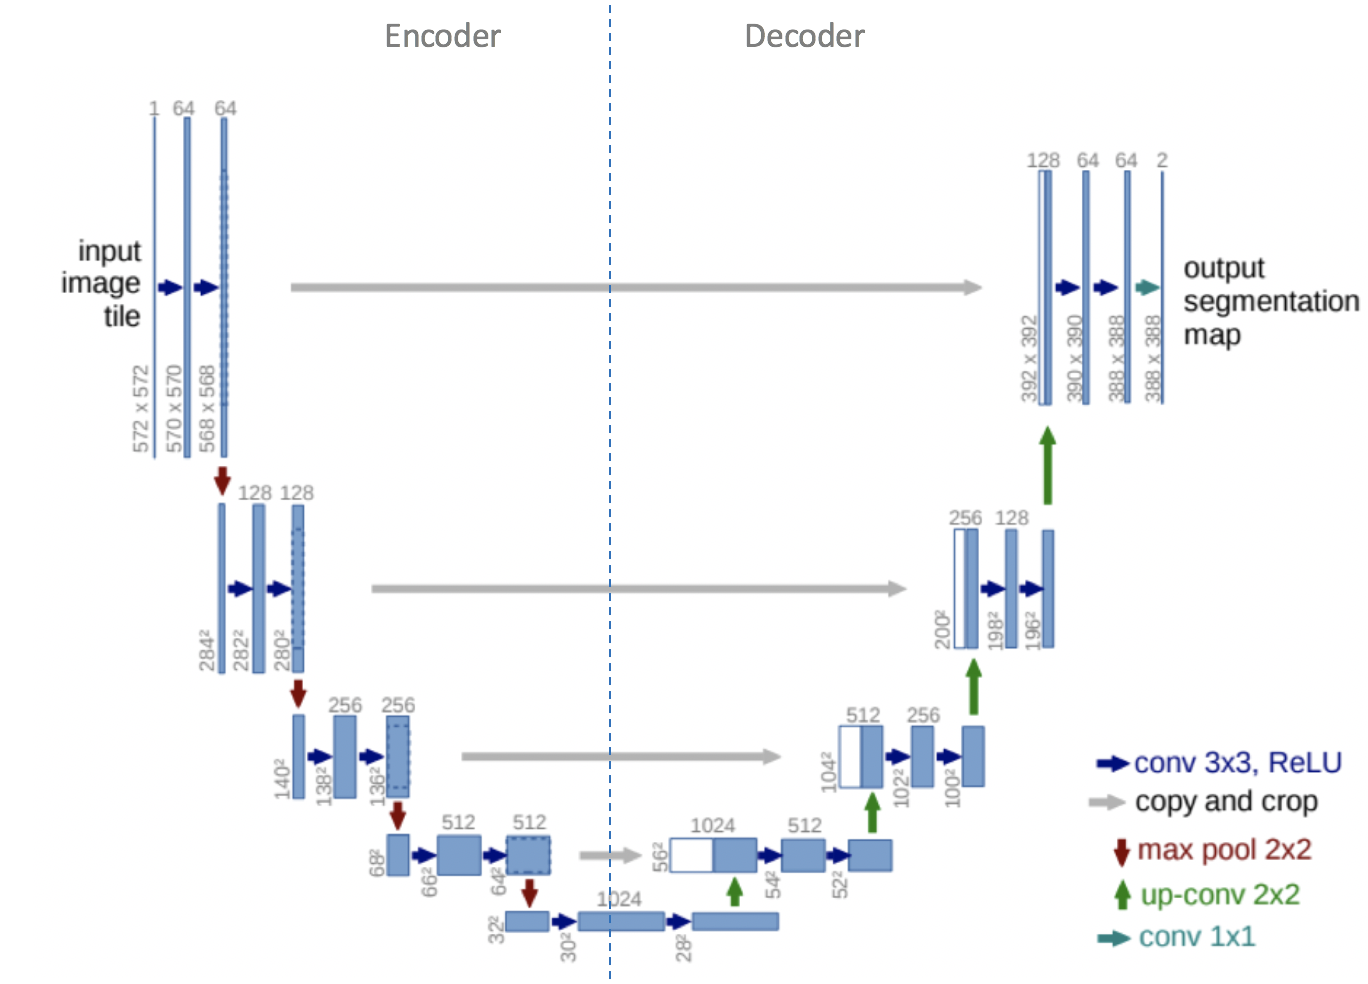
Source: https://arxiv.org/abs/1505.04597 (2015) U-Net: Convolutional Networks for Biomedical Image Segmentation
<p>At the beginning, the 512x512x3 input image is passed through two 3x3 convolutional layers (padding=’valid’ and strides=1) and ReLU activation where the number of channels is increased. The image is then downsampled as it is sent through a 2x2 max-pooling layer.   This process is repeated many times until the image size becomes 28x28x1024. After that, it is sent through a 2x2 transpose convolution layer with strides=2 instead of downsampling.
Then, it is consecutively concatenated with a cropped version of the previous feature map and is sent through two 3x3 convolutional layers like in the contraction path. 
U-net’s contribution is that concatenate the higher resolution function maps from the encoder network with the upsampled features when upsampling the network, in order to help learn better representations with corresponding convolutions. 
The image is segmented by U-net is shown as below.
    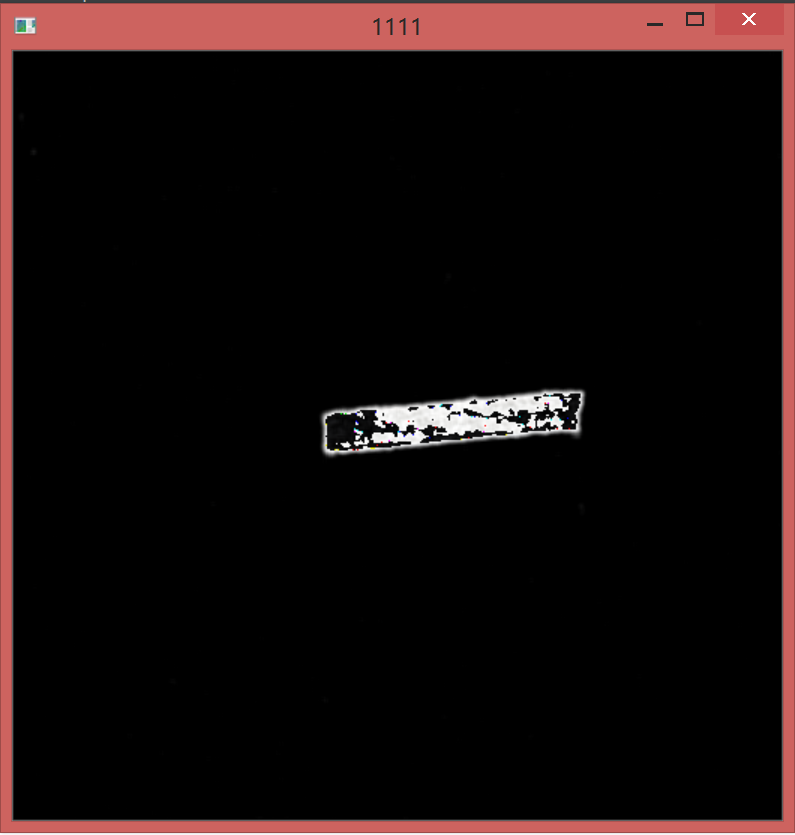




In [ ]:
##Uet.py

In [2]:
import torch
import torch.nn.functional as F
import torch.nn as nn




class Conv2d_BN(torch.nn.Module):
    def __init__(self, in_channels,out_channels):
        super(Conv2d_BN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3,padding=1)
        self.bn = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        fun1 = self.conv1(x)
        fun1 = self.bn(fun1)
        fun1 = F.relu(fun1)
        return fun1


class Conv2dT_BN(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Conv2dT_BN, self).__init__()
        self.conv1 = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.bn = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        fun2 = self.conv1(x)
        fun2 = self.bn(fun2)
        fun2 = F.relu(fun2)
        return fun2


class Unet(torch.nn.Module):
    def __init__(self):
        super(Unet, self).__init__()
        self.conv1 = Conv2d_BN(3, 8)
        self.conv11 = Conv2d_BN(8, 8)
        self.conv2 = Conv2d_BN(8, 16)
        self.conv22 = Conv2d_BN(16, 16)
        self.conv3 = Conv2d_BN(16, 32)
        self.conv33 = Conv2d_BN(32, 32)
        self.conv4 = Conv2d_BN(32, 64)
        self.conv44 = Conv2d_BN(64, 64)
        self.conv5 = Conv2d_BN(64, 128)
        self.conv55 = Conv2d_BN(128, 128)
        self.conv6 = Conv2d_BN(128, 64)
        self.conv66 = Conv2d_BN(64, 64)
        self.conv7 = Conv2d_BN(64, 32)
        self.conv77 = Conv2d_BN(32, 32)
        self.conv8 = Conv2d_BN(32, 16)
        self.conv88 = Conv2d_BN(16, 16)
        self.conv9 = Conv2d_BN(16, 8)
        self.conv99 = Conv2d_BN(8, 8)

        self.convt1 = Conv2dT_BN(128, 64)
        self.convt2 = Conv2dT_BN(64, 32)
        self.convt3 = Conv2dT_BN(32, 16)
        self.convt4 = Conv2dT_BN(16, 8)

        self.convo = nn.Conv2d(8, 3, kernel_size=1)

        self.mp = nn.MaxPool2d(2)
        self.do = nn.Dropout(0.5) # Prevent overfitting

    def forward(self, x):
        c11 = self.conv11(self.conv1(x))
        p1 = self.mp(c11)
        c22 = self.conv22(self.conv2(p1))
        p2 = self.mp(c22)
        c33 = self.conv33(self.conv3(p2))
        p3 = self.mp(c33)
        c44 = self.conv44(self.conv4(p3))
        p4 = self.mp(c44)

        d5 = self.do(self.conv55(self.do(self.conv5(p4))))

        ct1 = self.convt1(d5)
        x1 = [c44, ct1]
        x1 = torch.cat(x1, dim=1)
        x1 = self.do(x1)
        c66 = self.conv66(self.conv6(x1))

        ct2 = self.convt2(c66)
        x2 = [c33, ct2]
        x2 = torch.cat(x2, dim=1)
        x2 = self.do(x2)
        c77 = self.conv77(self.conv7(x2))

        ct3 = self.convt3(c77)
        x3 = [c22, ct3]
        x3 = torch.cat(x3, dim=1)
        x3 = self.do(x3)
        c88 = self.conv88(self.conv8(x3))

        ct4 = self.convt4(c88)
        x4 = [c11, ct4]
        x4 = torch.cat(x4, dim=1)
        x4 = self.do(x4)
        c99 = self.conv99(self.conv9(x4))

        x = F.relu(self.convo(c99))
        return x

# Read_dataset.py builds the function class to load the dataset.

In [ ]:
##Read_data.py

In [3]:
from torch.utils.data import Dataset
import os
import cv2

class UnetDataset(Dataset):
    def __init__(self, img_path, mask_img_path, train=True,transform=None):
        self.length = len(os.listdir(img_path))
        if train==True:
            self.img_path = img_path
            self.img_path_list = os.listdir(img_path)

            self.mask_img_path = mask_img_path
            self.mask_img_list = os.listdir(mask_img_path)

            self.transform = transform
        else:
            self.img_path = img_path
            self.img_path_list = os.listdir(img_path)[(self.length*4//5):]

            self.mask_img_path = mask_img_path
            self.mask_img_list = os.listdir(mask_img_path)[(self.length*4//5):]

            self.transform = transform

    def __getitem__(self, idx):
        input_img = cv2.imread(os.path.join(self.img_path,self.img_path_list[idx])).transpose(2,0,1)
        label_img = cv2.imread(os.path.join(self.mask_img_path,self.mask_img_list[idx])).transpose(2,0,1)
        if self.transform:
            input_img = self.transform(input_img)
            label_img = self.transform(label_img)
        return input_img, label_img

    def __len__(self):
        return len(self.mask_img_list)

# Main.py trains the constructed Unet model and saves the corresponding model.

In [4]:
##main.py

In [6]:
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
#from Read_Dataset import UnetDataset
# from Unet import Unet


train_img = './img/train_image'
train_label = './img/train_label'

traindata = UnetDataset(train_img, train_label, train=True)
train_loader = DataLoader(traindata, batch_size=6, shuffle=True)



device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = Unet()
model.to(device)

criterion = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data
        inputs, target = inputs.to(torch.float32), target.to(torch.float32)
        inputs, target = inputs.to(device), target.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % 10 == 9:
            print('[%d, %5d] loss:%.3f' % (epoch + 1, batch_idx + 1, running_loss / 10))
            running_loss = 0.0

save_model_dir = './save_model/model_6.pkl'
if __name__ == '__main__':
    for epoch in range(100):
        train(epoch)
        torch.save(model, save_model_dir)


FileNotFoundError: [WinError 3] 系统找不到指定的路径。: './img/train_image'

# Test.py tests images using the trained Unet model.

In [ ]:
##test.py

In [9]:
import torch
import cv2
# from core import dilate_demo,erode_demo,locate_and_correct,aug,test_num,getVProjection
import numpy as np




def predict(save_model_dir,img_path):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    imgss = cv2.imread(img_path, 1)
    img1 = imgss.copy()
    model_1 = torch.load(save_model_dir, map_location = 'cpu')
    model_1.to(device=device)
    with torch.no_grad():
        imgss = cv2.resize(imgss, (512, 512))
        imgss = imgss.reshape([1, 512, 512, 3]).transpose([0, 3, 1, 2])
        images = torch.from_numpy(imgss).contiguous().float().to(device)
        outputs = model_1(images)
        outputs = outputs.cpu().reshape([3, 512, 512]).numpy().transpose(1,2,0)
        img1 = img1.astype(np.uint8)
        outputs = outputs.astype(np.uint8)
        cv2.imshow("1111", outputs)
        cv2.waitKey()
        img2gray = cv2.cvtColor(outputs, cv2.COLOR_BGR2GRAY)
        dst = erode_demo(img2gray)
        dst = dilate_demo(dst)
        res = cv2.bitwise_and(img1,img1,mask=dst)
        imgs = np.hstack([img1,res])
        cv2.imshow('img1-res', imgs)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        return img1, outputs
save_model_dir = './save_model/model_3.pkl'
img_path = '101.png'
img1, outputs = predict(save_model_dir, img_path)
img_src_copy, Lic_img, _ = locate_and_correct(img1, outputs)
img = aug(Lic_img[0])
txt = test_num(img)
print(txt)


图片亮度足够，不做增强
['1', 'U', 'Q', 'B', '9', '5', '7']


# Video.py detects the license plate appearing in the video and calculates how long the plate is visible.

In [ ]:
##video.py

In [10]:
import numpy as np
import torch
import cv2
# from core import locate_and_correct,aug,test_num

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = torch.load('./save_model/model_5.pkl',map_location='cpu').to(device)

font = cv2.FONT_HERSHEY_SIMPLEX
cap = cv2.VideoCapture("123_Trim_Trim1.mp4")
times = 0.0
while(1):
    with torch.no_grad():
        ret, frame = cap.read()
        # show a frame
        img = cv2.resize(frame, (512, 512))
        img_data = img.reshape([1, 512, 512, 3]).transpose([0, 3, 1, 2])
        out = model(torch.from_numpy(img_data).contiguous().float().to(device))
        out = out.cpu().numpy().reshape([3, 512, 512]).transpose(1, 2, 0)

        img1 = img.astype(np.uint8)
        outputs = out.astype(np.uint8)
        img_src_copy, Lic_img,locate_postion = locate_and_correct(img1, outputs)
        if len(Lic_img)>0:
            img = aug(Lic_img[0])
            txt = test_num(img)
            txts = ''
            for tt in txt:
                txts += str(tt)
            if len(txt)>4:
                times += 1.0
            imgzi = cv2.putText(img_src_copy, str(txts), locate_postion, font, 1.0, (0, 0, 255), 2)
            imgzi = cv2.putText(imgzi, 'Times {}s'.format(str(times//12.0)), (15,50), font, 1.0, (0, 0, 255), 2)
            cv2.imshow('capture',imgzi)
        else:
            cv2.imshow('capture', img_src_copy)
        if cv2.waitKey(100) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

图片亮度足够，不做增强
图片亮度足够，不做增强
图片亮度足够，不做增强


KeyboardInterrupt: 